In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

This example is intended to show how to use a class in a way that's more relevant to AREN 

In [2]:
def f2c(temp_f):
    temp_c = (temp_f - 32) * 5 / 9
    return temp_c
    
def c2f(temp_c):
    temp_f = (temp_c - 32) * 9 / 5
    return temp_f

This object represents an HVAC system. It should be used in conjunction with a house model, but if you want to compare multiple hvac installations in the same house it might be useful to organize HVAC as a seperate class from House

In [3]:
class HVAC:
    def __init__(self, p_cooling, p_heating, seer, hspf):
        self.pc = p_cooling
        self.ph = p_heating
        self.seer = seer
        self.hspf = hspf

Here's a house object that will update the temperature inside the hosue.

In [4]:
class House:
    def __init__(self, hvac, wall_r, wall_c, init_temp=22, dt=1):
        self.hvac = hvac
        self.r = wall_r
        self.c = wall_c
        self.temp = init_temp
        self.dt = dt
        self.time = 0
        
    def get_current_oat(self, time):
        return 30 + np.sin(2 * np.pi * time / (24 * self.dt))
        
    def update(self, action):
        """
        Let the input 'action' be +1 for heating, 0 for nothing, 
        or -1 for cooling.
        """
        self.time += 1
        oat_current = self.get_current_oat(self.time)
        p_hvac = 1000 * (np.clip(action, 0, None) * self.hvac.ph + np.clip(action, None, 0) * self.hvac.pc)
        self.temp += (((oat_current - self.temp) / self.r) + p_hvac / 3600) / self.c * self.dt
        return self.temp

In [5]:
ashp = HVAC(7, 26, 14, 8.2) # an airsource heatpump
myhome = House(ashp, 7.5, 5)

In [6]:
t_in = []
actions = [] 
for _ in range(5):
    action = np.random.randint(-1,1)
    t_in += [myhome.update(action)]
    actions += [action]

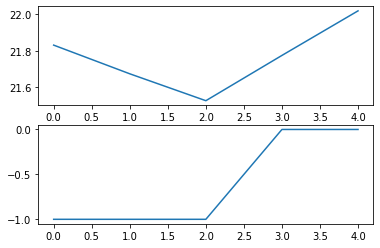

In [7]:
fig, ax = plt.subplots(2)
ax[0].plot(t_in)
ax[1].plot(actions)